<a href="https://colab.research.google.com/github/PRAFULPAWAR8888/AI-ML-Projects2025/blob/main/DL/DL6-Face_Mask_Detection/DL_Face_Mask_Detection_using_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DL-6 Face Mask Detection Using Convolutional Neural Network**

#**Work Flow**

 **Dataset=>  Image Processing => Train Test Split => Convolutional nural network => Evolution**

In [ ]:
! pip install kaggle

In [ ]:
!ls /content


kaggle.json  sample_data


In [ ]:
!mkdir -p ~/.kaggle


In [ ]:
!cp /content/kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!ls ~/.kaggle


kaggle.json


In [ ]:
!kaggle datasets list


ref                                                           title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
wardabilal/spotify-global-music-dataset-20092025              Spotify Global Music Dataset (2009–2025)          1289021  2025-11-11 09:43:05.933000          16387        381  1.0              
neurocipher/heartdisease                                      Heart Disease                                        3491  2025-12-11 15:29:14.327000           2114         55  1.0              
kundanbedmutha/exam-score-prediction-dataset                  Exam Score Prediction Dataset                      325454  2025-11-28 07:29:01.047000           5863        114  1.0              
ajinkyachintawar/sales-and-customer

# Importing the Face Mask Dataset

In [ ]:
# API to fetch the dataset from kaggle
! kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 93% 151M/163M [00:00<00:00, 1.58GB/s]
100% 163M/163M [00:00<00:00, 1.54GB/s]


In [ ]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing The Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow

from PIL import Image
from sklearn.model_selection import train_test_split


In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2634.jpg', 'with_mask_3522.jpg', 'with_mask_3491.jpg', 'with_mask_2850.jpg', 'with_mask_2453.jpg']
['with_mask_773.jpg', 'with_mask_1528.jpg', 'with_mask_951.jpg', 'with_mask_964.jpg', 'with_mask_2548.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2733.jpg', 'without_mask_3069.jpg', 'without_mask_2257.jpg', 'without_mask_652.jpg', 'without_mask_3739.jpg']
['without_mask_20.jpg', 'without_mask_3754.jpg', 'without_mask_858.jpg', 'without_mask_3622.jpg', 'without_mask_773.jpg']


In [ ]:
print("Number of with mask images:", len(with_mask_files))
print("Number of without mask images:", len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


  # **Creating Labels for the two class of Images**

with mask ---> 1

without mask ---> 0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])


7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# **Displaying the images**

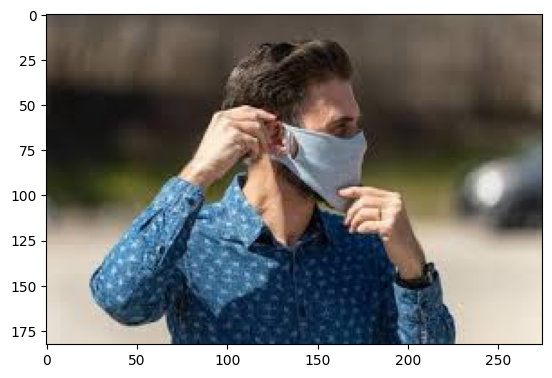

In [ ]:
# displaying with mask images
img = mpimg.imread('/content/data/with_mask/with_mask_2590.jpg')
implot = plt.imshow(img)

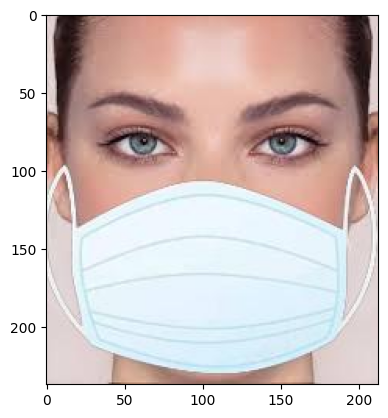

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_1546.jpg')
implot = plt.imshow(img)

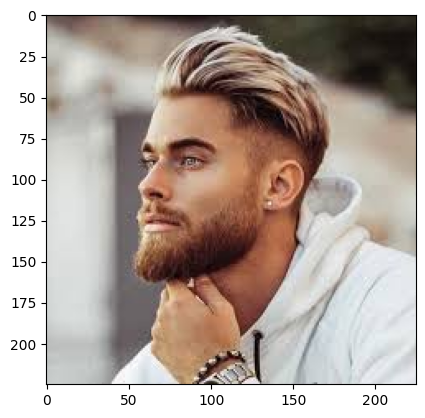

In [ ]:
# without mask images
img = mpimg.imread('/content/data/without_mask/without_mask_2590.jpg')
implot = plt.imshow(img)

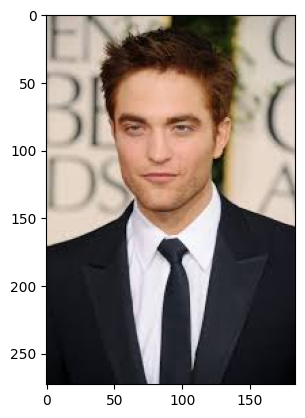

In [ ]:
# without mask images
img = mpimg.imread('/content/data/without_mask/without_mask_2690.jpg')
implot = plt.imshow(img)

#**Image Processing**

1. Resizing Images
2. Convert the images into numpy array

In [ ]:
# convert images to numpy arrays with mask

data = []

with_mask_path = '/content/data/with_mask/'

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data)


7553

In [ ]:
type(data)

list

array([[[206, 197, 180],
        [206, 197, 180],
        [207, 198, 181],
        ...,
        [214, 215, 206],
        [223, 224, 218],
        [ 90,  90,  87]],

       [[206, 197, 180],
        [206, 197, 180],
        [207, 198, 181],
        ...,
        [213, 213, 204],
        [223, 224, 218],
        [ 90,  90,  87]],

       [[206, 197, 180],
        [206, 197, 180],
        [207, 198, 181],
        ...,
        [211, 211, 202],
        [223, 224, 218],
        [ 90,  90,  87]],

       ...,

       [[197, 186, 190],
        [197, 186, 190],
        [196, 185, 189],
        ...,
        [231, 213, 196],
        [238, 226, 214],
        [103,  93,  86]],

       [[210, 199, 203],
        [209, 198, 202],
        [207, 196, 200],
        ...,
        [232, 212, 195],
        [239, 224, 213],
        [103,  93,  85]],

       [[211, 202, 205],
        [210, 201, 204],
        [207, 198, 201],
        ...,
        [231, 206, 187],
        [241, 220, 204],
        [104,  87,  78]]], dtype=uint8)
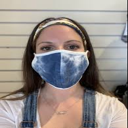

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
type(data)

list

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays
x = np.array(data)
y = np.array(labels)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

# *Train Test Split*